In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

# Lecture 10

In this lecture, we will:
1. Introduce python Lists
2. Show how to build tables from rows instead of columns
3. finish our discussion on grouping
4. Introduce pivots -- a special kind of grouping
5. Introduce joins

---

## Lists

Lists in python are like arrays but they can contain things of different types and you make them by using square brackets:

In [2]:
make_array(1,5,'hello', 5.0)

array(['1', '5', 'hello', '5.0'],
      dtype='<U32')

In [3]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [4]:
another_list = [1, 5, 'hello', 5.0, make_array(1,2,3)]
another_list

[1, 5, 'hello', 5.0, array([1, 2, 3])]

In [5]:
another_list = [another_list, 1]
len(another_list)
another_list

[[1, 5, 'hello', 5.0, array([1, 2, 3])], 1]

You have to use square brakets when accessing elements from a list (you can't use item).

In [6]:
make_array(1,5,'hello', 5.0).item(0) # .item() is exclusive to arrays

'1'

In [7]:
another_list[2] # when we want to access an element in a list, we use []

IndexError: list index out of range

In [ ]:
another_list[1]

Recall that for arrays you could do either. (In the real world, most people would probably use square brackets).

In [8]:
my_array = make_array("Apple", "Banana", "Corn")
my_array[1]

'Banana'

Same thing as:

In [9]:
my_array.item(1)

'Banana'

### Rows from lists

We need lists to be able to add a row to our table.  Why?

Here we make a table with a column (we have been doing this all semester).

In [10]:
Table().with_columns('Numbers', [1, 2, 3])
# Table() initializes a table
# .with_columns # adds new columns 

Numbers
1
2
3


Here we make an empty table with just column labels. (This is new!)

In [11]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


Here we add rows to our table.  Each row is a `List` of elements -- one for each column.

In [12]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


---

<center> Return to Slides </center>

---

## Grouping

For this part of the notebook we will use the following toy data:

In [13]:
cones = Table.read_table('data/cones.csv')
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


**Exercise:** Use the `group` function to determine the number of cones with each flavor.

In [14]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


<details> <summary>Click for Solution</summary>

```python
cones.group('Flavor')
```
</details>

**Exercise:** Use the `group` function to compute the average price of cones for each flavor.

In [15]:
cones.group('Flavor',np.average)

Flavor,Color average,Price average,Rating average
bubblegum,,4.75,1
chocolate,,5.08333,4
strawberry,,4.4,1.5


<details> <summary>Click for Solution</summary> 

```python
cones.group('Flavor', np.average)
 ```
</details>

**Exercise:** Use the `group` function to compute min price of cones for each flavor.

In [16]:
cones.group('Flavor',min)

Flavor,Color min,Price min,Rating min
bubblegum,pink,4.75,1
chocolate,dark brown,4.75,3
strawberry,pink,3.55,1


In [17]:
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


In [18]:
# categorize by flavor AND color
cones.group(['Flavor', 'Color'],max)

Flavor,Color,Price max,Rating max
bubblegum,pink,4.75,1
chocolate,dark brown,5.25,5
chocolate,light brown,4.75,4
strawberry,pink,5.25,2


**Question**:
Why does color have a min?

<details> <summary>Click for Solution</summary>

```python
cones.group('Flavor', np.min)
```

---

<center> Return to Slides </center>

---

## Review Grouping Using the Welcome Survey

Now let's use the group function to study you:

In [21]:
survey = Table.read_table("data/classdatasurvey_w24.csv") # changed file path name to our current quarter's survey
survey

Timestamp,What year are you in?,How would you rate yourself on a scale of 10 from 1 (introvert) to 10 (extrovert),How many texts do you send per day?,"Are you left-handed, right-handed or both?",What position do you sleep in?,How many hours of sleep do you get?,How many siblings do you have?,"What pets do you have? If more than one, separate with commas.",Make up a very random 4-digit number,Do you have a tattoo?,How do you get to work or school?
1/16/2024 15:14:27,First,4,20,Right,Stomach,7-8,1,0,2376,No,walk
1/16/2024 15:14:40,Second,3,5,Right,Back,6,1,cat,4635,No,walk
1/16/2024 15:15:23,Third,4,"15-30, depends",Right,Back,5-7,3,nan,3790,No,Bike
1/16/2024 15:17:50,Third,5,0,Right,Back,6h,no,no,6117,No,Bus
1/16/2024 15:17:51,First,2,"Depends on the day, between 5-30.",Right,Stomach,"On average, 5.",3,0,6782,Yes,walk
1/16/2024 15:19:07,First,2,5-30,Right,Stomach,5,3,0,6782,Yes,walk
1/16/2024 15:22:39,First,5,nan,Right,Left side,6-7 :(,2 :D,I have two cats,5939,Yes,Bike
1/16/2024 15:23:32,First,2,70,Right,Right side,5,2,nan,3276,No,Bus
1/16/2024 15:25:20,Third,6,20,Right,Right side,6-7,1,1,2323,Yes,Bike
1/16/2024 15:25:39,First,5,nan,Right,Left side,6-7 :(,Two,Two cats! :D,3216,Yes,Bike


In [22]:
#oops the table above needs some cleaning! 
# luckily, we did some tidying up in lec05.ipynb
# let's read in the cleaned up csv called welcome_survey_w24_cleaned.csv
survey = Table.read_table("data/welcome_survey_w24_cleaned.csv")
survey

Year,Extraversion,Number of texts,Handedness,Sleep position,Hours of Sleep,Siblings,Pets,Random Number,Tattoo,Commute
Second,3,5,Right,Back,6,1,cat,4635,No,walk
Second,3,30,Right,Left side,8,1,1,1025,Yes,walk
First,2,5,Right,Back,8,2,Jack Mackerel,7682,No,walk
Third,5,3,Right,Left side,6,1,1 cat,4444,Yes,Bike
Second,6,50,Right,Back,8,1,1,1614,No,Bike
Second,4,160,Right,Stomach,8,1,Dog,127,No,walk
Second,1,5,Right,Right side,7,1,"cat, dog",3421,No,Bus
First,3,10,Right,Right side,10,3,4 dogs,2739,No,walk
First,8,50,Right,Right side,8,2,2,4388,No,walk
First,5,20,Right,Back,9,2,1,1,No,walk


**Exercise:** What happens if we group by `"Year"` with no additional arguments?

In [23]:
survey.group("Year")

Year,count
First,26
Fourth,4
Second,13
Third,8


What is the relationship between year and the average amount of sleep?

**Exercise:** Computer the average `"Hours of sleep"` for each `"Year"` and display the result as bar chart with the bars in a meaningful order.

In [26]:
average_sleep = survey.select('Year', 'Hours of Sleep').group('Year', np.average)
average_sleep = average_sleep.sort('Hours of Sleep average', descending = True)
average_sleep

Year,Hours of Sleep average
Second,7.84615
First,7.73077
Third,7
Fourth,6.5


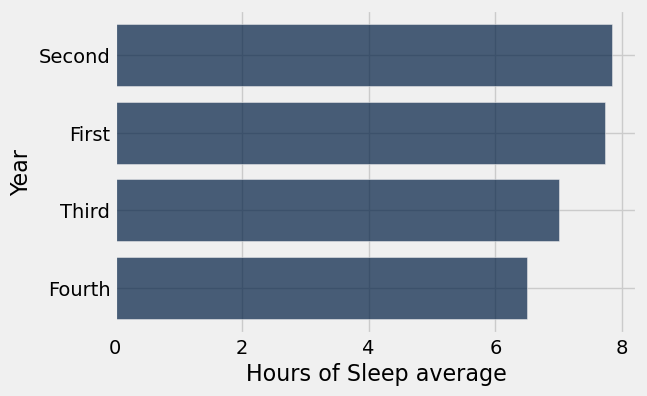

In [27]:
average_sleep.barh('Year') # bar chart horizontal

**Excercise**: Use the function below to convert the values in the 'year' column to strings that sort meaninfully. (use apply)

In [ ]:
#IGNORE THIS FOR NOW
def convert_year_string(y):
    if y == 'First Year':
        return 'Year 1'
    elif y == 'Second Year':
        return 'Year 2'
    elif y == 'Third Year':
        return 'Year 3'
    elif y == 'Fourth Year':
        return 'Year 4'
    elif y == 'Firth Year or above':
        return 'Year 5+'
    else:
        return 'graduate'

<details><summary>Click for Solution</summary>
    
```python
survey['year_'] = survey.apply(convert_year_string, 'Year')
survey.select('year_', 'Hours of sleep').group('year_', np.average).barh('year_')
plots.xlim([6,7.5])
```
    
</details>

### Understanding Extraversion

How extraverted is the class?

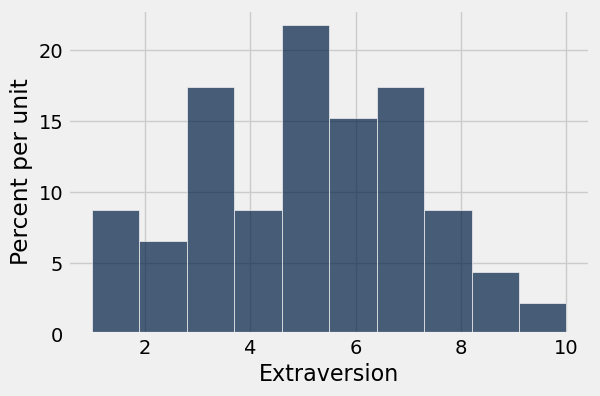

In [28]:
survey.hist('Extraversion')

**Exercise:** Compute the *average* `"Number of textees"`, `"Hours of sleep"`, `"Piercings"` for each value of `"Extraversion"`.  Save the resulting table as `by_extra`.

In [33]:
by_extra = (
    survey
    .select('Extraversion', 'Number of texts', 'Hours of Sleep', 'Siblings') # TODO: convert Siblings from str to integers...
    .group('Extraversion', np.mean)
)
by_extra

Extraversion,Number of texts mean,Hours of Sleep mean,Siblings mean
1,13.75,6.5,
2,16.6667,7.33333,
3,12.375,7.25,
4,43.75,7.25,
5,24.7,7.5,
6,30.8571,7.85714,
7,18.75,7.625,
8,52.5,7.75,
9,65,7.5,
10,500,13,


<details><summary>Click for Solution</summary>
    
```python
by_extra = (
    survey
    .select("Extraversion", "Number of textees", "Hours of sleep", "Piercings")
    .group('Extraversion', np.mean)
)
by_extra
```
    
</details>

Do you see any trends?  Let's plot the data to make it clearer.

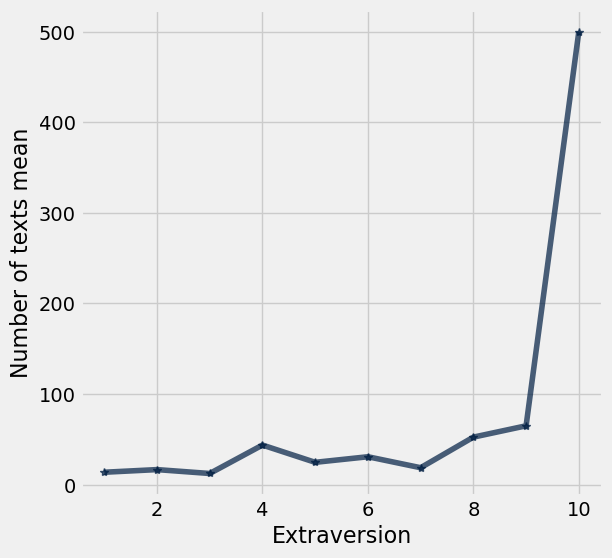

In [34]:
by_extra.plot("Extraversion", "Number of texts mean", marker="*")

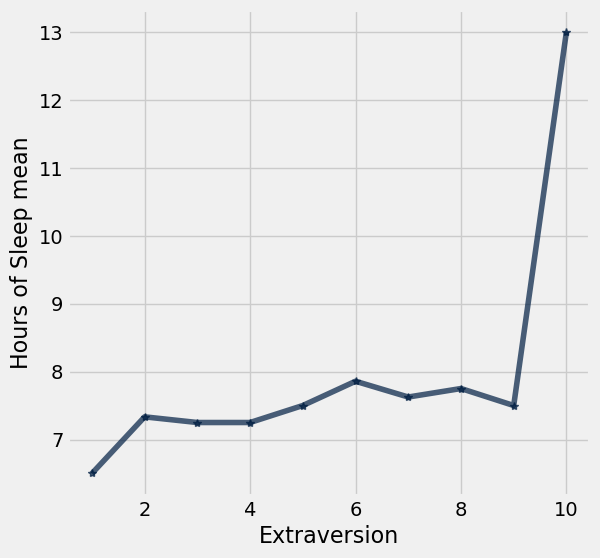

In [35]:
by_extra.plot("Extraversion", "Hours of Sleep mean", marker="*")

---

<center> Return to Slides </center>

---

## Grouping by Two Columns 

Do right-handed people tend to sleep on their left side and left-handed people sleep on their right side? 

**Exercise:** Use the group function to count how many people are in each combination of `"Handedness"` and `"Sleep position"`.

In [36]:
(
    survey
    .group(["Handedness", "Sleep position"])
)

Handedness,Sleep position,count
Both,Stomach,2
Left,Left side,1
Right,Back,8
Right,Left side,14
Right,Right side,22
Right,Stomach,4


<details><summary>Click for Solution</summary> 
    
```python
(
    survey
    .group(column_or_label=["Handedness", "Sleep position"])
    .show()
)
```
</details>

What combination of `"Handedness"` and `"Sleep position"` results in the most sleep on average?

**Exercise:** Use group to answer the above question.

In [39]:
(
    survey
    .select('Handedness', 'Sleep position','Hours of Sleep')
    .group(['Handedness','Sleep position'], np.average)
    .sort('Hours of Sleep average', descending = True)
)
# our ambidexterous folks who sleep on their stomach sleep the most on average! cool!

# our right-handed folks who sleep on their left side on average, sleep the least.

Handedness,Sleep position,Hours of Sleep average
Both,Stomach,9.5
Left,Left side,9
Right,Stomach,8.75
Right,Back,7.625
Right,Right side,7.31818
Right,Left side,7.14286


<details><summary>Click for Solution</summary>
    
```python
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(['Handedness', 'Sleep position'], np.average)
    .show()
)
```
    
</details>

## Pivot Tables

When grouping by two columns it will sometimes be easier to re-arrange the table so the columns correspond to the *values* of one of the original grouped columns. 

Here is an example where I construct a pivot table that is equivalent to the above two column groupby operation:

```python
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(["Handedness", "Sleep position"], np.average)
    .show()
)
```

In [40]:
(
    survey
    .pivot('Handedness', 'Sleep position', 'Hours of Sleep', np.average)
)

Sleep position,Both,Left,Right
Back,0,0,7.625
Left side,0,9,7.14286
Right side,0,0,7.31818
Stomach,9.5,0,8.75


Here I am rewriting the example by explicity naming the function arguments.  You wouldn't do this in practice but it helps to highlight the meaning of the four things we passed to the function above.

In [41]:
(
    survey
    .pivot(
        columns = "Handedness", # The column whose unique values become columns
        rows    = "Sleep position", # The column whose unique values become rows
        values  = "Hours of Sleep", # The column that will be used to compute the cells
        collect = np.average # How to aggregate the values 
    )
)

Sleep position,Both,Left,Right
Back,0,0,7.625
Left side,0,9,7.14286
Right side,0,0,7.31818
Stomach,9.5,0,8.75


Just as with the regular `group` function you will often want counts of combinations. In this case, you only need to specify the column to turn into columns and the column to turn into rows.

In [42]:
survey.pivot("Sleep position", "Handedness")

Handedness,Back,Left side,Right side,Stomach
Both,0,0,0,2
Left,0,1,0,0
Right,8,14,22,4


Pivots can be useful for visualizations:

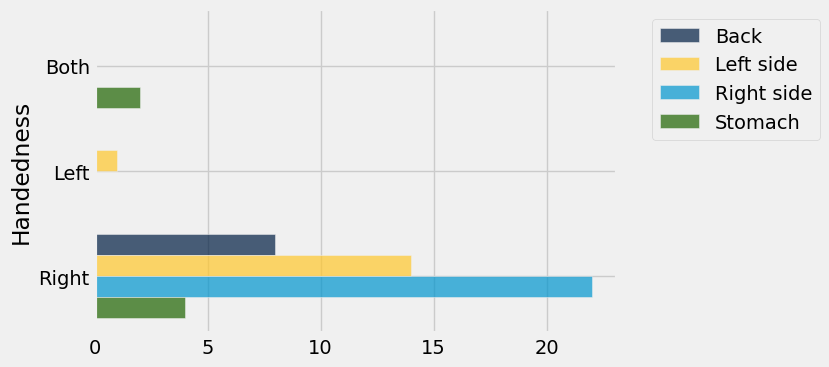

In [43]:
survey.pivot("Sleep position", "Handedness").barh("Handedness")

---

<center> Return to Slides </center>

---

## Joins

We use join to **join** two tables on a column.

In [ ]:
drinks

In [ ]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

**Exercise:** Combine the `drinks` and `discounts` table into a new table which has all possible discounts for each drink.

In [ ]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

<details><summary>Click for Solution</summary>
    
```python
combined = drinks.join(column_label='Cafe', other=discounts, other_label='Location')
combined
```
    
</details>

**Exercise:** Calculate the lowest rate you can get for each drink using the available coupons.

In [ ]:
discount_frac = 1 - combined.column('Coupon % off')/100
# or you can do 
# discount_percentage = 100 -
combined.column('Coupon % off')
discount_frac

In [ ]:
(
    combined
    .with_column('Discounted Price', combined.column('Price') * discount_frac) # added new column with sale price
    .select('Drink', 'Discounted Price') # selected Drink and Discounted Price
    .group('Drink', min) # grouped by Drink and the cheapest price from Discounted Price
)

<details><summary>Click for Solution</summary>
    
```python
combined = drinks.join('Cafe', discounts, 'Location') # from previous question

discount_frac = 1-combined.column("Coupon % off")/100.0

(
    combined
    .with_column("Discounted Price", combined.column("Price") * discount_frac)
    .select("Drink", "Discounted Price")
    .group("Drink", min)
)

```
</details>

**Exercise:** What happens if I run the following? How many rows will it produce.

In [ ]:
drinks.join('Cafe', drinks, 'Cafe')

In [ ]:
drinks

In [ ]:
drinks.pivot('Cafe', 'Drink') # pivot allows us to categorize, in a visually efficient way
# our categorical variables
# inside the pivot (two-way) table, we see counts of items that satisfy the category grouping

In [ ]:
drinks.pivot('Cafe', 'Drink','Price',np.average)

---

<center> Return to Slides </center>

---

## Discussion Questions 

For the following practice questions we will use the sky scraper dataset

In [44]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

this_year = 2024
sky = Table.read_table("data/skyscrapers_v2.csv")
sky = (
    sky
    .with_column("age", this_year - sky.column("completed"))
    .drop("completed")
)
sky

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,10
Willis Tower,steel,Chicago,442.14,50
432 Park Avenue,concrete,New York City,425.5,9
Trump International Hotel & Tower,concrete,Chicago,423.22,15
Empire State Building,steel,New York City,381,93
Bank of America Tower,mixed/composite,New York City,365.8,15
Stratosphere Tower,concrete,Las Vegas,350.22,28
Aon Center,steel,Chicago,346.26,51
John Hancock Center,steel,Chicago,343.69,55
Chrysler Building,steel,New York City,318.9,94


**Exercise:**  For each city, what’s the tallest building for each material?

In [48]:
sky.group('material')
sky.group('city')

city,count
Atlanta,38
Austin,17
Baltimore,14
Boston,32
Charlotte,12
Chicago,358
Cincinnati,13
Cleveland,16
Columbus,13
Dallas,20


In [49]:
# group by material: mixed/composite, steel, concrete AND city

# max height

tall_pivot = sky.pivot('material', 'city', 'height',max)
# .pivot('column label for column headings', 'column label for ROW headings', 
#        optional third argument for values, optional third argument for function to apply to values)
tall_pivot

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


<details><summary>Click for Solution</summary>
    
```python
tall_pivot = sky.pivot("material", "city", "height", max)
tall_pivot
```
</details>

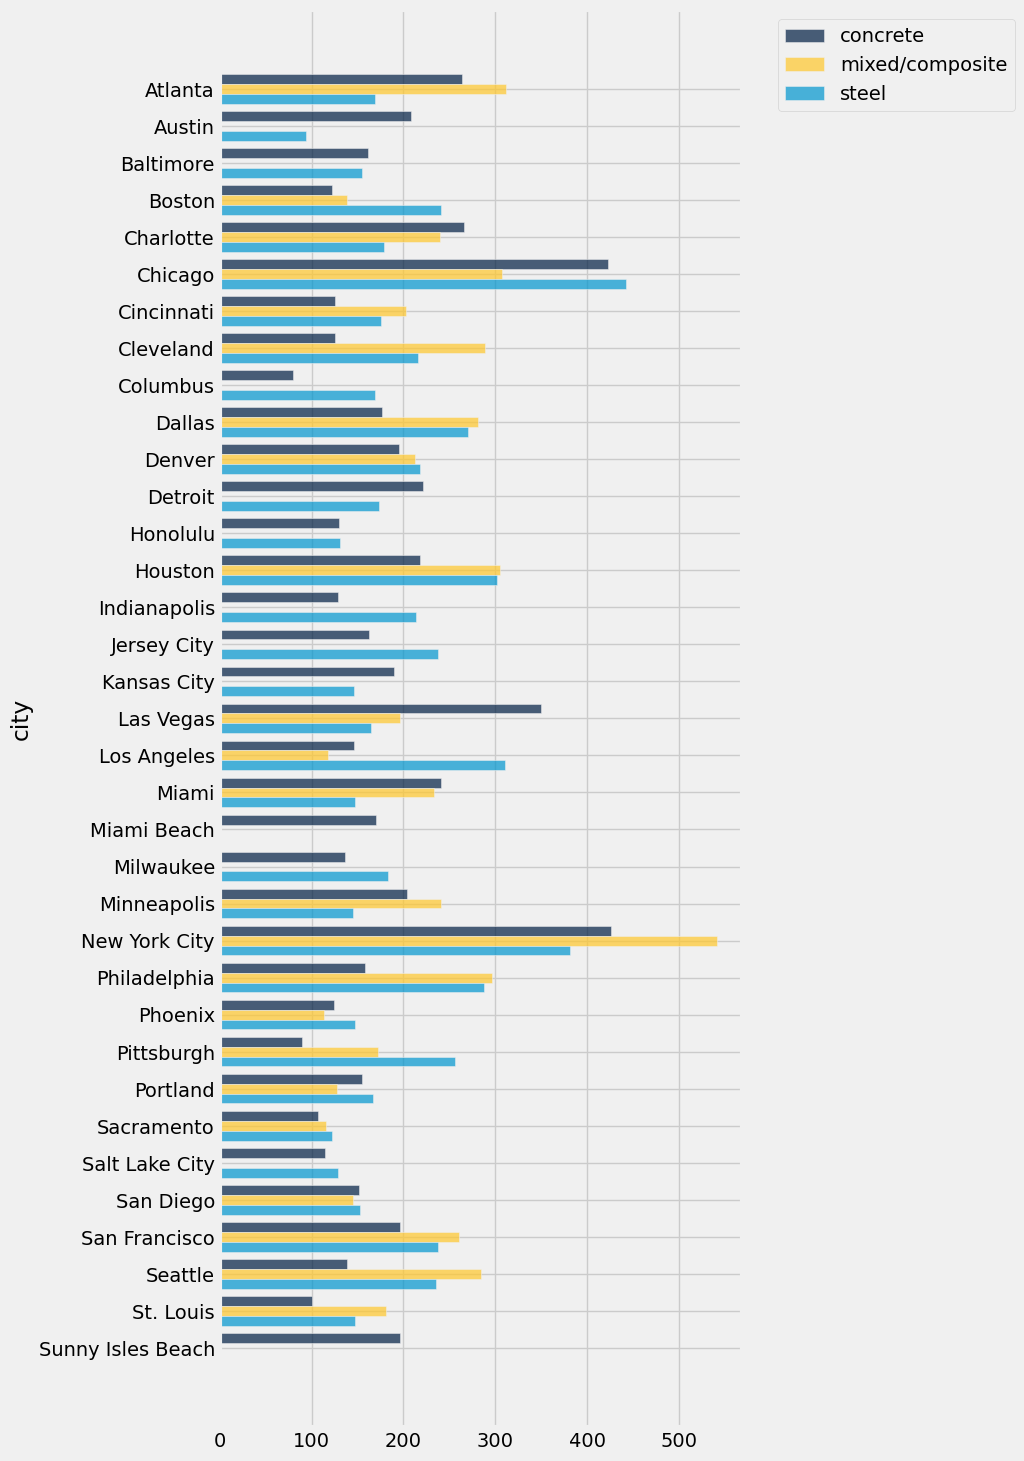

In [50]:
tall_pivot.barh("city")

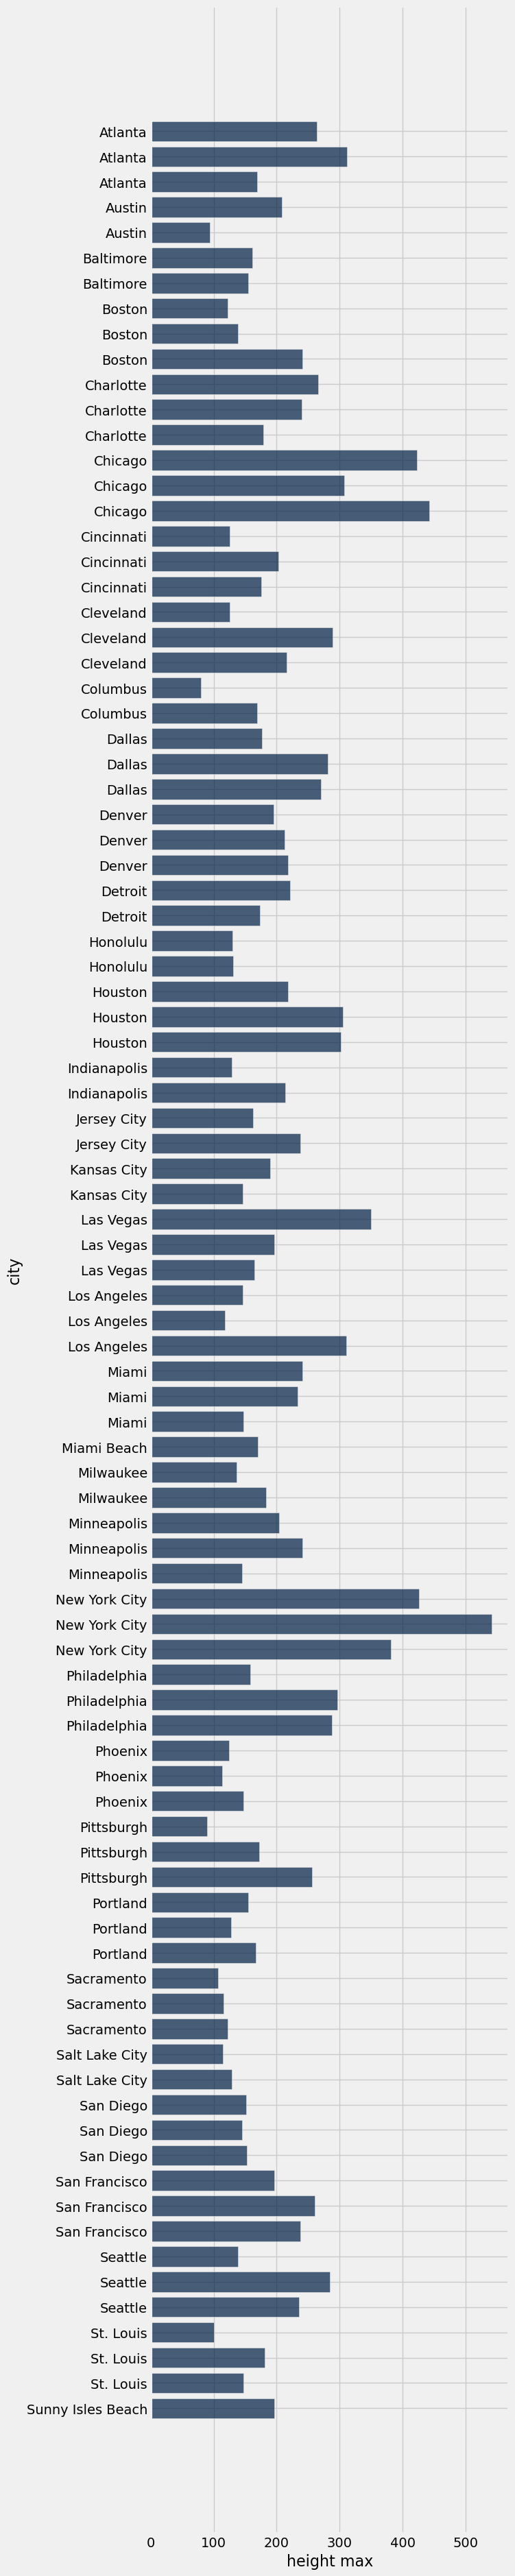

In [58]:
# can you recreate the above barchart but instead of using a pivot table
# can you generate it with a group table? 
# using the group method
# remember, we want to see the tallest building for each material, for each city
sky_group = sky.group(['city','material'], max)
sky_group = sky_group.select('city', 'material', 'height max')
sky_group.barh('city','height max') # doesn't allow us to group all materials based on city, on x-axis
# we see three bars associated with Atlanta
# generating a bar chart from a pivot table, allows for that grouping to take place
# all materials associated with a given city

In [56]:
Table.barh?

Signature:
Table.barh(
    self,
    column_for_categories=None,
    select=None,
    overlay=True,
    width=None,
    **vargs,
)
Docstring:
Plot horizontal bar charts for the table. Redirects to ``Table#ibarh`` if interactive plots
are enabled with ``Table#interactive_plots``

Args:
    ``column_for_categories`` (``str``): A column containing y-axis categories
        used to create buckets for bar chart.

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each will be displayed separately.
    show (bool): whether to show the figure if using interactive plots; if false, the 
        figure is returned instead
    vargs: Additional arguments that get passed into `plt.barh`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh
        for additional arguments that can be passed into vargs.

Raises:
    ValueError -- Every selected except column for ``column_for_categories``
        must be numerical.

Returns:
    Horiz

**Exercise:** For each city that has at least 50 buildings in the dataset, compute the average height of buildings broken down by material.  Make a bar chart with the cities and the average height of buildings for each material.

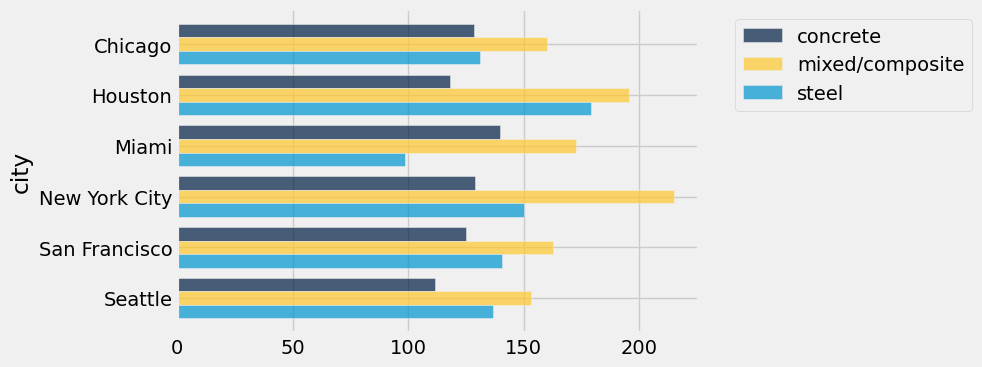

In [76]:
# find cities with at least 50 buildings 
sky.group('city').sort('count', descending = True) # 6 cities with more than 50 buildings
num_buildings = sky.group('city').where('count', are.above(50))
sky_num_buildings = sky.join('city', num_buildings,'city')
# grouped by material, find average heights for each material
sky_num_buildings.group('material', np.average) # this gives us only three rows and average height for each material

# going back to the question, we need for each city, the average building height for each material
# 6 cities, 3 materials -> at least 18 rows
# try group 
sky_num_buildings.group(['city','material'],np.average)
# try pivot
sky_num_pivot = sky_num_buildings.pivot('city','material','height',np.average)
sky_num_pivot

# OR we can switch columns and rows
sky_num_pivot = sky_num_buildings.pivot('material', 'city','height',np.average)
# generate bar chart with averages of heights

sky_num_pivot.barh('city')

<details><summary>Click for Solution</summary>
    
```python
num_buildings = sky.group("city")
(
    sky
    .join("city", num_buildings)
    .where("count", are.above_or_equal_to(50))
    .pivot("material", "city", "height", np.mean)
    .barh("city")
)
```
</details>

**Exercise:** Generate a table of the names and ages of the oldest buildings for each combination of city and materials.

In [77]:
def first(x):
    return x[0]
    
    
(
    sky
    .sort("age", descending=True) 
    .select("city", "material", "name", "age")
    .group(["city", "material"], first)
    #.where("city", "San Francisco") #<- for fun
)

city,material,name first,age first
Atlanta,concrete,Westin Peachtree Plaza,48
Atlanta,mixed/composite,One Atlantic Center,37
Atlanta,steel,FlatironCity,127
Austin,concrete,One American Center,40
Austin,steel,University of Texas Tower,87
Baltimore,concrete,Charles Towers North Apartments,57
Baltimore,steel,Emerson Tower,113
Boston,concrete,Harbor Towers I,53
Boston,mixed/composite,Ellison Building,32
Boston,steel,Marriott's Custom House,109


<details><summary>Click for Solution</summary>
    
```python
def first(x):
    return x[0]
    
    
(
    sky
    .sort("age", descending=True) 
    .select("city", "material", "name", "age")
    .group(["city", "material"], first)
    #.where("city", "San Francisco") #<- for fun
)
```
    
</details>